# Step-1 : Business Problem Understanding
## *Identify relationship between total advertising spend and sales?
## *Our next ad campaign will have a total spend of 200,000 dollar how many units do we expect to sell as a result of this?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step-2: Data Understanding

## 2.1: Data Understanding

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\KIRTI RAJ PRADHAN'

In [4]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [5]:
df=pd.read_csv("Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


## if someone was to spending a total of 200,000 dollar , what would the expected sales be?
##  *We have simplified this quality a bit by combining all the features into 'total spend'

In [8]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']

In [9]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [10]:
df.drop(columns=['TV','radio','newspaper'],inplace=True)

In [11]:
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


## Step-3: Data Preprocessing

## 3.1: Exploratory Data Analysis (EDA)
### on the basis of this data , how should you spend advertising money in the future? These general questions might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Given ad spending, can sales be prdicted?

In [12]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


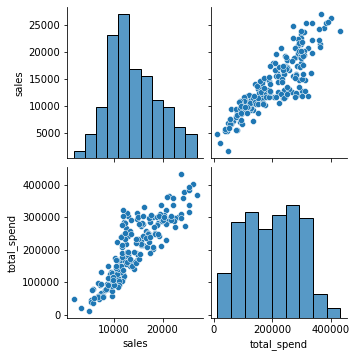

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


## Step-3.2: Data Cleaning

In [15]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

## Step-3.3: Data Wangling

In [16]:
## no encoding is required

## Step-3.4: Train_Test_split

In [17]:
x=df.drop(columns=["sales"])
x

,total_spend
0,337100
1,128900
2,132400
3,251300
4,250000
...,...
195,55700
196,107200
197,192700
198,391800


In [18]:
y=df['sales']
y

0      22100
1      10400
2       9300
3      18500
4      12900
       ...  
195     7600
196     9700
197    12800
198    25500
199    13400
Name: sales, Length: 200, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [20]:
x_train.head()

,total_spend
169,301300
97,227900
31,168900
12,124800
35,303300


In [21]:
x_test.head()

,total_spend
95,247800
15,296000
30,364400
158,93800
128,272500


In [22]:
y_train.head()

169    15000
97     15500
31     11900
12      9200
35     12800
Name: sales, dtype: int64

In [23]:
y_test.head()

95     16900
15     22400
30     21400
158     7300
128    24700
Name: sales, dtype: int64

## Step-4: Modelling   (y^=b0+b1x)
### MODELING WITH DIFFERENT PARAMETERS

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# save the model
model=LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
# print intersept (b0)
model.intercept_

4199.10650086872

In [28]:
# print cofficient (b1)
model.coef_

array([0.04895385])

# Prediction

In [29]:
train_predictions=model.predict(x_train)

In [30]:
test_predictions=model.predict(x_test)

In [31]:
train_predictions

array([18948.90088879, 15355.68844912, 12467.41141995, 10308.54672527,
       19046.80858469,  7023.7435277 , 20016.09477414,  6852.40505986,
       11468.75292173,  7816.79586452,  9760.26362821,  8575.58050777,
       15561.29461052, 16393.5100257 , 16036.14693565, 15992.08847249,
       13245.77760239, 15482.96845379, 17734.84545958, 19027.22704551,
       10680.59596971, 12188.37448663, 10822.56212877, 15850.12231343,
        8717.54666683, 17774.00853794, 12560.42373106, 19653.8362993 ,
        8428.71896392, 21758.85176123,  8051.77433469, 19115.34397183,
       25425.49497283, 18195.01163033, 16080.20539881, 13563.97761408,
       13240.88221759,  9770.0543978 , 17891.49777303, 14689.91611697,
       16437.56848886, 10499.46673228, 18474.04856366, 11600.9283112 ,
       18288.02394144, 11537.28830887,  8903.57128905, 18008.98700811,
       13671.67607957, 16736.18696136,  7973.44817796, 20701.44864547,
       23379.22412844, 16373.92848652, 17338.31929117, 12526.15603749,
      

In [32]:
test_predictions

array([16329.87002336, 18689.44549464, 22037.88869456,  8790.97743876,
       17539.03006777, 12168.79294745, 18292.91932623,  8115.41433702,
       15894.18077659, 15414.43306666,  7053.11583647,  8683.27897327,
       19996.51323496,  6387.34350432, 12433.14372639, 14636.06688422,
        7958.76202358, 15708.15615437, 10470.09442351, 17705.47315081,
       20647.59941272, 14890.62689357,  8614.74358613, 21807.80560918,
        8076.25125866,  7963.65740837, 18410.40856132, 12227.53756499,
       10313.44211007,  6044.66656866, 15145.18690292,  9486.12207968,
       19291.57782445, 11542.18369366, 20432.20248173, 17798.48546192,
        9280.51591828, 21935.08561386, 10920.46982467,  6637.00812888,
       11385.53138021, 13632.51300121,  9334.36515103,  8761.60512999,
       16045.93770524,  6925.83583179, 10435.82672995, 13515.02376612,
       11282.72829952, 10063.77748551, 12007.2452492 , 13417.11607022,
       10690.3867393 ,  8962.31590659,  8702.86051245, 12345.02680007,
      

## Step-5: Evaluation

In [33]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data: ",mean_absolute_error(y_test,test_predictions))
print("MAE for train data: ",mean_absolute_error(y_train,train_predictions))

MAE for test data:  1914.362736813055
MAE for train data:  1963.9767578200754


In [34]:
from sklearn.metrics import mean_squared_error
print("MSE for test data: ",mean_squared_error(y_test,test_predictions))
print("MSE for train data: ",mean_squared_error(y_train,train_predictions))

MSE for test data:  6415866.312543217
MSE for train data:  6811655.464246886


In [35]:
print("RMSE for test data: ",np.sqrt(mean_squared_error(y_test,test_predictions)))
print("RMSE for test data: ",np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data:  2532.956042362997
RMSE for test data:  2609.9148385046756


In [36]:
from sklearn.metrics import r2_score
print("R2 for test data: ",r2_score(y_test,test_predictions))
print("R2 for train data: ",r2_score(y_train,train_predictions))

R2 for test data:  0.7650262463310723
R2 for train data:  0.7404192834391545


In [37]:
# Test R-square
model.score(x_test,y_test)

0.7650262463310723

In [38]:
# Train R-square
model.score(x_train,y_train)

0.7404192834391545

# Checklist
## For any Supervised Machine Learning Algorithm (Other than Linear Regession)
### 1. Check wheather model has overfitting ar underfitting problem
### 2. Is Test Accuracy = Cross validation Score
### 4. Check model meets the business problem requirements
### 5. Finally, save the model and share to the deployment team
## For Linear Regression, in addition we have to
### 3. Check Assumptions(if it is Linear Regression)

## 1. Is model has underfitting or overfitting problem?
## Answer: Its's a good model.

## Is Test Accuracy = Cross validation score

In [39]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x,y,cv=5)
print(scores)

cv_score=scores.mean()
print("Cross Validation Score: ",cv_score)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score:  0.7433783178555419


## Check for Assumption
### 1. Linearity of errors

In [40]:
test_res=y_test-test_predictions

In [41]:
test_res.head()

95      570.129977
15     3710.554505
30     -637.888695
158   -1490.977439
128    7160.969932
Name: sales, dtype: float64

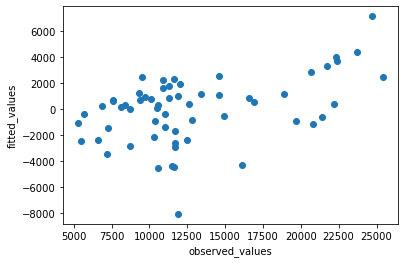

In [42]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

## 2.Normality of Errors

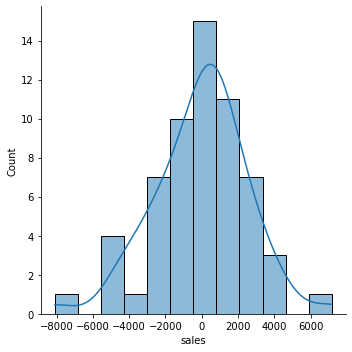

In [43]:
sns.displot(test_res,kde=True)
#plt.hist(test_res)
plt.show()

### Perfect bell curve is there

## 3.Equal Variance of Errors (Homoscadesicity)

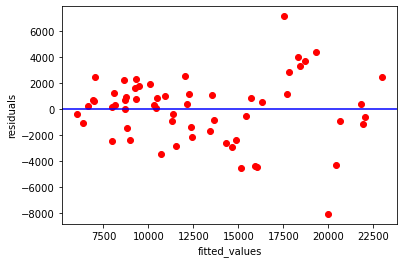

In [44]:
plt.scatter(test_predictions,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

## 4. Variables Significance

In [45]:
import statsmodels.formula.api as smf
model2=smf.ols("y~x",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           5.06e-62
Time:                        09:17:43   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step-6: Final Inferences
## Our next ad campaign will have a total spend of 200k on Ads,how many units could we expect to sell as a result of this?

In [46]:
# use the model to make predictions on a new value 
model.predict([[321400]])

C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19932.87323262])

## Save a model

In [47]:
from joblib import dump 

In [48]:
dump(model,'sale_model.joblib')

['sale_model.joblib']

## Load a Model

In [49]:
from joblib import load

In [50]:
loaded_model=load('sale_model.joblib')

In [51]:
loaded_model.predict([[200000]])

C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13989.87609126])